## Introduction
In this notebook, we utilize Tweepy library to extract tweets over 8000 tweets from ’20-04-2023’ to ’25-04-2023' about ’AMZN’ stock.
We evaluate the pre-trained GAN model to predict stock price on ’26-04-2023’. The resulting RMSE is 0.045.

## Import Libraries

In [1]:
pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29103 sha256=3c432e01acab7ef74211c94cef8ca9f9bff95a2bc7074b8be120203476f4dc50
  Stored in directory: /root/.cache/pip/wheels/47/51/06/380dc516ea78621870b93ff65527c251afdfdc5fa9d7f4d248
Successfully built ta


In [28]:
import tweepy
import re
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import yfinance as yf
import ta
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from pickle import dump
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
nltk.download('vader_lexicon')
import datetime
from joblib import load
import tensorflow as tf
from sklearn.metrics import mean_squared_error

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Get Tweets

In [3]:
# We specift time range for tweets to be extracted.
# start - the date we want to consider tweets from
# end - the date we want to consider until to

start = datetime.datetime(2023, 4, 25, 00, 00, 0, 0)
end =  start + datetime.timedelta(days=1)

In order to retrieve twitter data, personal bearer_token was used for authentication. 

Reference for Tweepy library usage https://docs.tweepy.org/en/stable/client.html#search-tweets. Search_recent_tweets only allows to extract 100 tweets at a time, therefore we utilised next_token parameter to acces tweets in the page.

In [4]:
bearer_token = ''
client = tweepy.Client(bearer_token)

tweets = []
response = client.search_recent_tweets("Amazon stock", expansions='author_id', start_time = start, end_time = end, max_results=100)
tweets.append([response.data])
# next_token gives the link for the next page containing tweets
next_token = response[3]['next_token']

# We continue extracting tweets until all the tweets mentioning "Amazon stock" have been retrieved for the specified date.
for i in range(100):
  response = client.search_recent_tweets("Amazon stock", expansions='author_id', start_time = start, end_time = end, max_results=100, next_token=next_token)
  tweets.append([response.data])
  if 'next_token' in response[3]:
    next_token = response[3]['next_token']
  else:
    print('End of tweets for the selected day')
    break

print(tweets[0][0])

End of tweets for the selected day
[<Tweet id=1651012677869633537 text="RT @ahouse4all: If you'd like to help an LA mutual aid group stock up on supplies (especially the snacks + shirts + shorts + shampoo + cond…">, <Tweet id=1651012457081495553 text='🔥🚨 Attention: Splatoon OLED Switch is in stock! https://t.co/7LGvLaIPNC #ad #Switch #SwitchRestock #SplatoonOLEDSwitch'>, <Tweet id=1651012343885623297 text="RT @mrsholden2019: $30 will #clearthelist of pencils and erasers in time for state testing in 2 weeks! I'd love to have a full stock so we'…">, <Tweet id=1651012330686238724 text='RT @Johnny24450: THIS WILL MAKE THE RISE TO GREATNESS EVEN BETTER!!! &gt; REMEMBER &gt; AMAZON STOCK WENT FROM $1.50 TO $106 PER SHARE IN 1999 &gt;…'>, <Tweet id=1651012034543378434 text='RT @Johnny24450: THIS WILL MAKE THE RISE TO GREATNESS EVEN BETTER!!! &gt; REMEMBER &gt; AMAZON STOCK WENT FROM $1.50 TO $106 PER SHARE IN 1999 &gt;…'>, <Tweet id=1651011886748401670 text="RT @ahouse4all: If you'd like to h

We specify date and run the code above to extract the tweets

In [233]:
# tweets for '25-04-2023'
tweets25 = tweets

In [229]:
# tweets for '24-04-2023'
tweets24 = tweets

In [225]:
# tweets for '23-04-2023'
tweets23 = tweets

In [221]:
# tweets for '22-04-2023'
tweets22 = tweets

In [217]:
# tweets for '21-04-2023'
tweets21 = tweets

In [213]:
# tweets for '20-04-2023'
tweets20 = tweets

In [59]:
#https://stackoverflow.com/questions/24399820/expression-to-remove-url-links-from-twitter-tweet

def remove_links(text):
    # We remove URLs from tweet daat
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    # We peplace all matches of the pattern with an empty string
    cleaned_text = re.sub(url_pattern, '', text)
    return cleaned_text

In [252]:
# clean_data appends all the tweets and removes the links.

def clean_data(tweet_data, day):
  df = pd.DataFrame()
  for i in range(len(tweet_data)):
    for tweet in tweet_data[i][0]:
      cleaned_tweet = remove_links(tweet.text)
      df = df.append([cleaned_tweet])

  df['Tweets'] = df[0]
  df['Date'] = datetime.datetime(2023, 4, day)
  df = df.iloc[:, 1:]
  df = df[df['Tweets'] != np.NaN]

  return df

In [ ]:
df = pd.DataFrame()

In [281]:
clean_tweet_data20 = clean_data(tweets20, 20)
clean_tweet_data20 = clean_data(tweets20, 21)
clean_tweet_data20 = clean_data(tweets20, 22)
clean_tweet_data20 = clean_data(tweets20, 23)
clean_tweet_data20 = clean_data(tweets20, 24)
clean_tweet_data20 = clean_data(tweets20, 25)

In [282]:
df = df.append([clean_tweet_data20, clean_tweet_data21, clean_tweet_data22, clean_tweet_data23, clean_tweet_data24, clean_tweet_data25])

In [286]:
df['Stock Name'] = 'AMZN'
df['Company Name'] = 'Amazon.com, Inc.'

In [292]:
df.reset_index(drop=True, inplace=True)

In [37]:
df.head()

,Tweets,Date,Stock Name,Company Name
0,RT @MohamedAd_: Prime Day 2023 checklist:\n✅ F...,2023-04-20,AMZN,"Amazon.com, Inc."
1,🛎️ IN STOCK ALERT 🛎️\n\nMSI RTX 4080 16GB SUPR...,2023-04-20,AMZN,"Amazon.com, Inc."
2,"This will, of course, mean I'm less likely to ...",2023-04-20,AMZN,"Amazon.com, Inc."
3,🛎️ IN STOCK ALERT 🛎️\n\nAMD Ryzen 9 7950X3D is...,2023-04-20,AMZN,"Amazon.com, Inc."
4,RT @KathrynStarke: Stock the _____for your tea...,2023-04-20,AMZN,"Amazon.com, Inc."


In [38]:
df.tail()

,Tweets,Date,Stock Name,Company Name
7127,RT @masonmalonecom: Stock up for summer readin...,2023-04-25,AMZN,"Amazon.com, Inc."
7128,RT @fieldsofprofit: AMAZON SOURCING CHECKLIST\...,2023-04-25,AMZN,"Amazon.com, Inc."
7129,✅stock: 2023/04/24 19:00(EST)\n\nNZXT H9 Flow ...,2023-04-25,AMZN,"Amazon.com, Inc."
7130,"Amazon PS5 Stock, Models &amp; Price : 25 Apri...",2023-04-25,AMZN,"Amazon.com, Inc."
7131,「【 [オリジナル・カラオケ付] &lt;2023ラッカーマスターサウンド&gt; [2CD...,2023-04-25,AMZN,"Amazon.com, Inc."


In [42]:
# we save twitter dataset
df.to_csv('AMZN Tweets 20-04-2023 to 25-04-2023.csv', index=False)

## Get Historical Data

In [21]:
# Obtaining historical data for 'AMZN'
startdate = pd.to_datetime('2023-03-01').date()
enddate = pd.to_datetime('2023-04-26').date()
stock_df = yf.download('AMZN', start = startdate, end = enddate)

[*********************100%***********************]  1 of 1 completed


In [22]:
stock_df['Stock Name'] = 'AMZN'
stock_df = stock_df.reset_index()
stock_df = stock_df.rename(columns={'index': 'Date'})

In [23]:
stock_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
34,2023-04-19,101.580002,105.120003,101.389999,104.300003,104.300003,58398900,AMZN
35,2023-04-20,103.529999,105.250000,103.209999,103.809998,103.809998,57696900,AMZN
36,2023-04-21,106.099998,108.150002,105.080002,106.959999,106.959999,86689700,AMZN
37,2023-04-24,107.660004,109.230003,105.070000,106.209999,106.209999,69575600,AMZN
38,2023-04-25,104.910004,105.449997,102.449997,102.570000,102.570000,65026800,AMZN


## Prepare Data

The get_clean_data function is a slight modification of the same clean_data function used in GAN_for_10_Stocks_Final.ipynb. 

The difference is that we derived technical indicators for stock_df before merging with twitter data.

In [11]:
def get_clean_data(tweet_data, stock_data, stock_name):
  stock_name = stock_name
  df = tweet_data[tweet_data['Stock Name'] == stock_name]
  df = df.dropna(subset=['Tweets'])
  sent_df = df.copy()
  sent_df["sentiment_score"] = ''
  sent_df["Negative"] = ''
  sent_df["Neutral"] = ''
  sent_df["Positive"] = ''

  %time
  sentiment_analyzer = SentimentIntensityAnalyzer()
  for indx, row in sent_df.T.iteritems():
      try:
          sentence_i = unicodedata.normalize('NFKD', sent_df.loc[indx, 'Tweets'])
          sentence_sentiment = sentiment_analyzer.polarity_scores(sentence_i)
          sent_df.at[indx, 'sentiment_score'] = sentence_sentiment['compound']
          sent_df.at[indx, 'Negative'] = sentence_sentiment['neg']
          sent_df.at[indx, 'Neutral'] = sentence_sentiment['neu']
          sent_df.at[indx, 'Positive'] = sentence_sentiment['pos']
      except TypeError:
          print (sent_df.loc[indx, 'Tweets'])
          print (indx)
          break

  sent_df['Date'] = pd.to_datetime(sent_df['Date'])
  sent_df['Date'] = sent_df['Date'].dt.date
  sent_df = sent_df.drop(columns=['Negative', 'Positive', 'Neutral', 'Company Name'])
  twitter_df = sent_df.groupby(['Date']).mean()

  twitter_df = twitter_df.reset_index()

  stock_data['Date'] = pd.to_datetime(stock_data['Date'])
  stock_data['Date'] = stock_data['Date'].dt.date

  def get_tech_ind(data):

    # Adding Simple Moving Average
    data['MA7'] = ta.trend.sma_indicator(close = data.iloc[:,5], window = 7)
    data['MA20'] = ta.trend.sma_indicator(close = data.iloc[:,5], window = 20)
    
    # Adding MACD
    data['MACD'] = ta.trend.macd(close = data.iloc[:,5])

    # Adding Rate of Change
    data['ROC'] = ta.momentum.roc(close = data.iloc[:,5], window = 12)

    # Adding Exponential Moving Average
    data['EMA'] = ta.trend.ema_indicator(close = data.iloc[:,5])

    # Adding Bollinger Bands
    data['Bollinger_Bands'] = ta.volatility.BollingerBands(close = data.iloc[:,5]).bollinger_mavg()

    # Adding LogMomentum
    data['Log_Momentum'] = np.log(data.iloc[:,5]-1)

    return data

  tech_df = pd.DataFrame()

  df_1 = stock_data[stock_data['Stock Name'] == stock_name]
  df_2 = get_tech_ind(df_1)
  df_2 = df_2.iloc[25:,].reset_index(drop=True)
  tech_df = pd.concat([tech_df,df_2], axis = 0)

  tech_df.iloc[:, 1:] = pd.concat([tech_df.iloc[:, 1:].ffill()])
  final_df = tech_df.merge(twitter_df, on = ['Date'], how = 'left')
  final_df = final_df.loc[:,['Date', 'Stock Name', 'sentiment_score', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','MA7', 'MA20', 'MACD', 
                             'ROC', 'EMA', 'Bollinger_Bands', 'Log_Momentum']]
  final_df.reset_index(inplace = True, drop = True)

  final_df = final_df.dropna(subset=['sentiment_score'])

  print(final_df.head())
  
  cols = 0
  rows = 0 

  fig, ax = plt.subplots(1, 1, figsize = (20,8), tight_layout = True)

  for tic in list(final_df['Stock Name'].unique()):
      ax.plot(final_df.loc[final_df['Stock Name'] == tic, 'Date'] ,final_df.loc[final_df['Stock Name'] == tic,'Close'], color='#008B8B')
      ax.set(xlabel='Date', ylabel='USD', title=f'{tic} Stock Price')
      ax.xaxis.set_major_formatter(DateFormatter('%D'))

  plt.show()
  
  cols = 0
  rows = 0 

  fig, ax = plt.subplots(1, 1, figsize = (20,8), tight_layout = True);

  for tic in list(final_df['Stock Name'].unique()):
    
      ax.plot(final_df.loc[final_df['Stock Name'] == tic, 'Date'] ,final_df.loc[final_df['Stock Name'] == tic,'MA7'], color='g', linestyle='--', label='Moving Average (7 days)');
      ax.plot(final_df.loc[final_df['Stock Name'] == tic, 'Date'] ,final_df.loc[final_df['Stock Name'] == tic,'Close'], color='#6A5ACD', label='Closing Price');
      ax.plot(final_df.loc[final_df['Stock Name'] == tic, 'Date'] ,final_df.loc[final_df['Stock Name'] == tic,'MA20'], color='r', linestyle='-.', label='Moving Average (20 days)');
      ax.set(xlabel='Date', ylabel='USD', title=f'{tic} Technical Indicators');
      ax.xaxis.set_major_formatter(DateFormatter('%D'));
      ax.legend();


  plt.show();

  final_df = final_df.drop(['Stock Name'], axis = 1)
  date_col = final_df['Date']
  final_df = final_df.set_index('Date')
  final_df = final_df.sort_values('Date')
  final_df.reset_index(inplace=True,drop=True)

  X = final_df.drop(['Adj Close'], axis = 1)
  y = pd.DataFrame(final_df['Adj Close'])

  return X, y, date_col


def data_preprocess(X, y, days):
  X_scaler = MinMaxScaler()
  X_scaled_df = X_scaler.fit_transform(X)
  print(X_scaled_df.shape)

  days_to_consider = days
  n_features = X_scaled_df.shape[1]

  def x_y_predictions(x_data):
    X_data = []

    for i in range(0,len(x_data),1):
      X = x_data[i: i + days_to_consider][:,:]
      if len(X) == days_to_consider:
        X_data.append(X)

    return np.array(X_data)

  X = x_y_predictions(X_scaled_df)

  return X

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.58 µs
          Date Stock Name  sentiment_score        Open        High  \
10  2023-04-20       AMZN         0.113389  103.529999  105.250000   
11  2023-04-21       AMZN         0.142138  106.099998  108.150002   
12  2023-04-24       AMZN         0.158337  107.660004  109.230003   
13  2023-04-25       AMZN         0.176680  104.910004  105.449997   

           Low       Close   Adj Close    Volume         MA7      MA20  \
10  103.209999  103.809998  103.809998  57696900  102.270001  101.2580   
11  105.080002  106.959999  106.959999  86689700  103.574286  101.6705   
12  105.070000  106.209999  106.209999  69575600  104.118572  102.0745   
13  102.449997  102.570000  102.570000  65026800  104.127143  102.3010   

        MACD       ROC         EMA  Bollinger_Bands  Log_Momentum  
10  1.791504  1.367048  102.126625         101.2580      4.632883  
11  2.044368  2.895625  102.870221         101.6705      4.663062  
12  2.1593

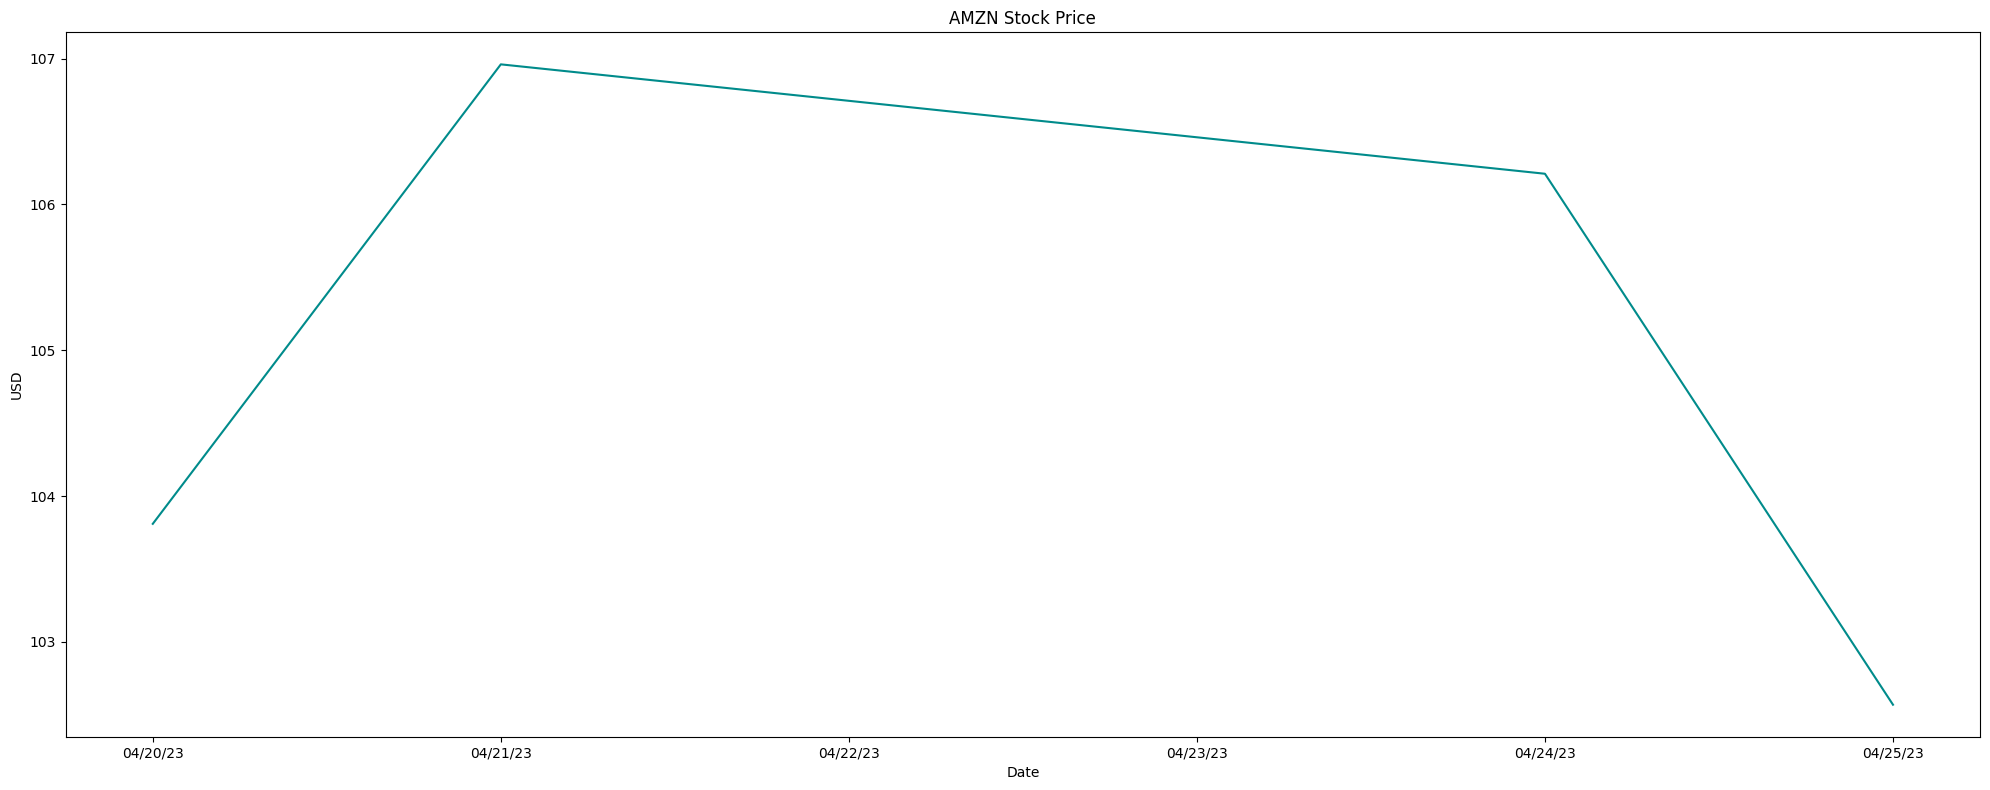

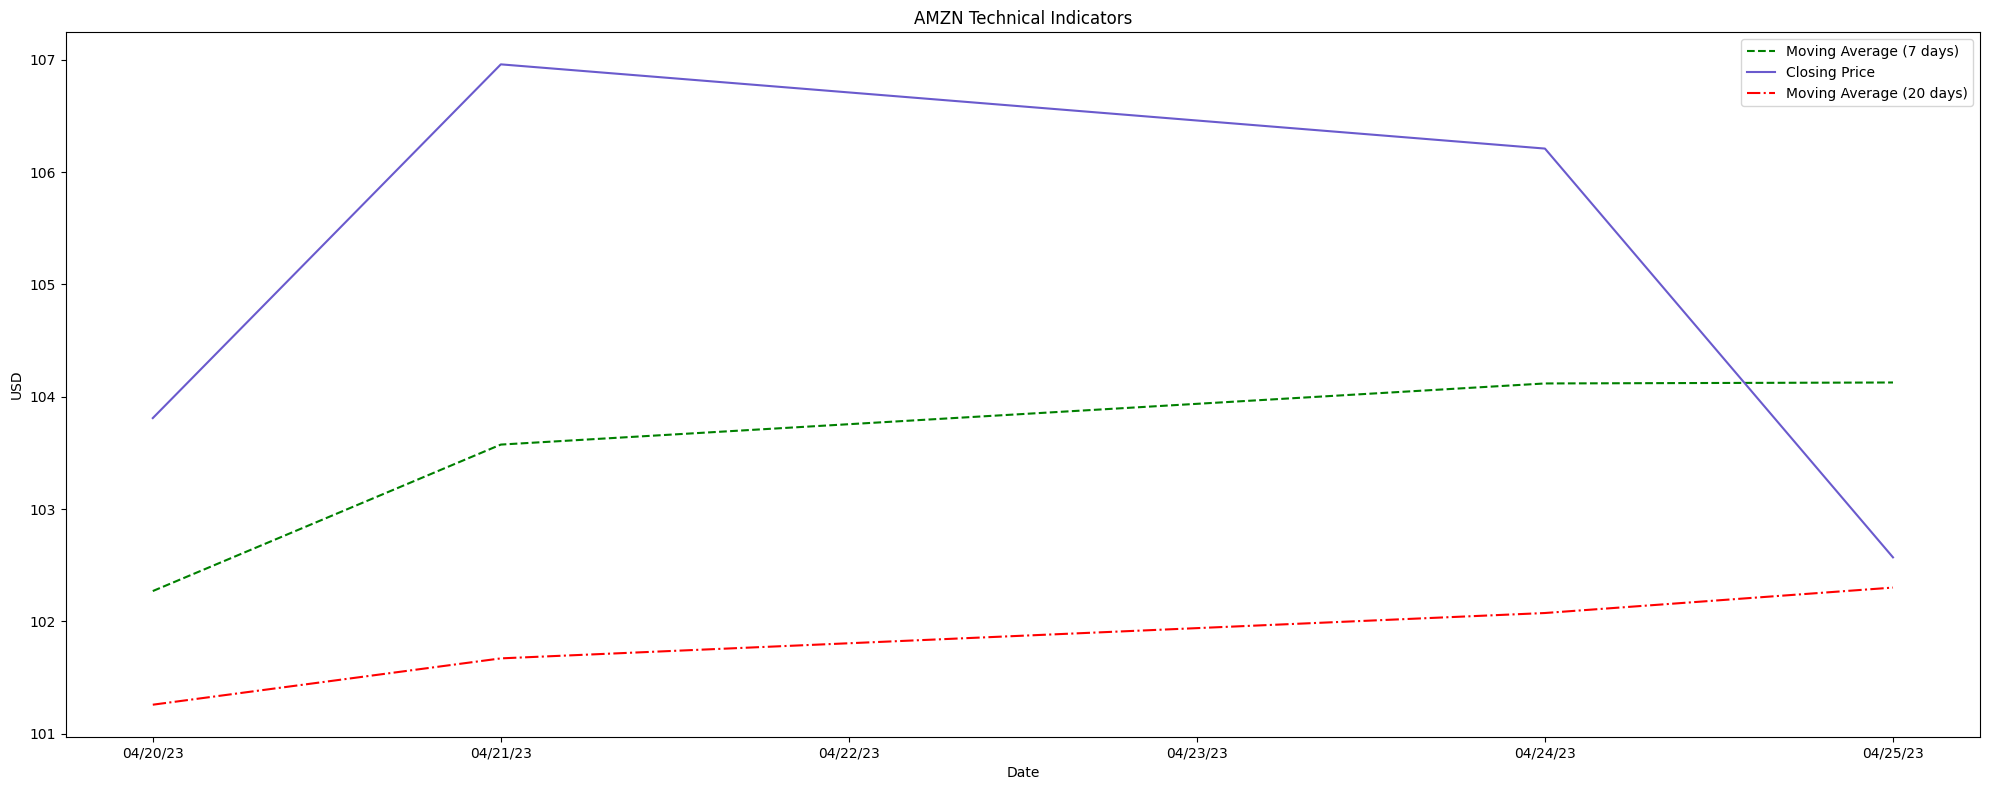

In [12]:
X, y, date = get_clean_data(df, stock_df, 'AMZN')

## GAN Model Evaluation 

In [13]:
print(X)

   sentiment_score        Open        High         Low       Close    Volume  \
0         0.113389  103.529999  105.250000  103.209999  103.809998  57696900   
1         0.142138  106.099998  108.150002  105.080002  106.959999  86689700   
2         0.158337  107.660004  109.230003  105.070000  106.209999  69575600   
3         0.176680  104.910004  105.449997  102.449997  102.570000  65026800   

          MA7      MA20      MACD       ROC         EMA  Bollinger_Bands  \
0  102.270001  101.2580  1.791504  1.367048  102.126625         101.2580   
1  103.574286  101.6705  2.044368  2.895625  102.870221         101.6705   
2  104.118572  102.0745  2.159354  5.054402  103.384033         102.0745   
3  104.127143  102.3010  1.934465  0.499708  103.258797         102.3010   

   Log_Momentum  
0      4.632883  
1      4.663062  
2      4.655958  
3      4.620748  


In [14]:
print(date)

10    2023-04-20
11    2023-04-21
12    2023-04-24
13    2023-04-25
Name: Date, dtype: object


In [15]:
X_test = data_preprocess(X,y,4)
X_test.shape

(4, 13)


(1, 4, 13)

In [18]:
# load scaler and model weights from GAN_for_10_Stocks_Final.ipynb
y_scaler = load('y_scaler.joblib')
gen_model_best = tf.keras.models.load_model('/content/generator_AMZN_499.h5')

We obtain real Adjusted closing price of 'AMZN' for '26-04-2023' 

In [26]:
startdate = pd.to_datetime('2023-04-26').date()
enddate = pd.to_datetime('2023-04-27').date()
AMZN_stock = yf.download('AMZN', start = startdate, end = enddate)
real_y = AMZN_stock['Adj Close']
print(AMZN_stock['Adj Close'])

[*********************100%***********************]  1 of 1 completed
Date
2023-04-26    104.980003
Name: Adj Close, dtype: float64


In [36]:
y_predicted = gen_model_best(X_test)
predicted_y = y_scaler.inverse_transform(y_predicted)

print('Predicted Y', predicted_y[0][0])

real_y = np.array([104.980003])

print('Real Y', real_y[0])

Test_RMSE = np.sqrt(mean_squared_error(real_y, predicted_y))
print('Test RMSE', Test_RMSE)

Predicted Y 104.9346720245559
Real Y 104.980003
Test RMSE 0.04533097544410225
